In [ ]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#  api key replace with actual api key
api_key='7ff16e785b474de1b8952635241110'

#cities to fetch the data from
cities=['Nairobi','Nakuru','Narok']


#Define the fields to  extract

def extract_weather_data(city, api_key):
    url=f'https://api.weatherapi.com/v1/current.json?key={api_key}&q={city}'
    response=requests.get(url)


    #check if the request was successful
    if response.status_code==200:
        data=response.json()

        #Extract needed  fields

        if 'location' in data and 'current' in data:
            city_name=data['location']['name']
            country=data['location']['country']
            humidity=data['current']['humidity']
            rainfall=data['current']['precip_mm']
            temparature=data['current']['temp_c']
            current=data['current']['temp_c']
            wind_speed=data['current']['wind_kph']
            wind_direction=data['current']['wind_dir']
            condition=data['current']['condition']['text']
            last_updated=data['current']['last_updated']
            timestamp=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            weather_desc=data['current']['condition']['text']

            return {
                'city_name':city_name,
                'country':country,
                'humidity':humidity,
                'rainfall' :data['current']['precip_mm'],
                'temparature':data['current']['temp_c'],
                'current':current,
                'wind_speed':wind_speed, # Added wind_speed to fix NameError
                'wind_direction':wind_direction, # Added colon and wind_direction to fix SyntaxError
                'condition':condition,
                'last_updated':last_updated,
                'timestamp':timestamp,
                'weather_desc':weather_desc
            }


        else:
            print(f'Missing data for {city}')
            return None
    else:
        print(f'Failed to fetch data for {city}, status code: {response.status_code}') # Added response.status_code to print the actual status code
        return None

#fetch weather data for multiple cities
weather_data_list=[]
for city in cities:
    weather_data=extract_weather_data(city,api_key)
    if weather_data:
        weather_data_list.append(weather_data)

#convert the weather into a data frame
if weather_data_list:
    weather_df=pd.DataFrame(weather_data_list) # Changed pd to pandas as it was imported as pandas
    print(weather_df)

#save the dataframe to a csv file
    weather_df.to_csv('weather_data.csv',index=False)
    print('Weather data saved to weather_data.csv')
else:
    print('No weather data available')

  city_name country  humidity  rainfall  temparature  current  wind_speed  \
0   Nairobi   Kenya        44       0.0         24.4     24.4        10.4   
1    Nakuru   Kenya        38       0.1         23.9     23.9        10.8   
2     Narok   Kenya        38       0.0         24.8     24.8        22.7   

  wind_direction           condition      last_updated            timestamp  \
0            ESE       Partly cloudy  2024-10-11 13:30  2024-10-11 10:32:46   
1             SE  Patchy rain nearby  2024-10-11 13:30  2024-10-11 10:32:46   
2             SE               Sunny  2024-10-11 13:30  2024-10-11 10:32:46   

         weather_desc  
0       Partly cloudy  
1  Patchy rain nearby  
2               Sunny  
Weather data saved to weather_data.csv


In [ ]:
#Load your weather data CSV file into a Pandas DataFrame
weather_df=pd.read_csv('weather_data.csv')

# Display the first rows of the dataframe
print(weather_df.head())





  city_name country  humidity  rainfall  temparature  current  wind_speed  \
0   Nairobi   Kenya        44       0.0         24.4     24.4        10.4   
1    Nakuru   Kenya        38       0.1         23.9     23.9        10.8   
2     Narok   Kenya        38       0.0         24.8     24.8        22.7   

  wind_direction           condition      last_updated            timestamp  \
0            ESE       Partly cloudy  2024-10-11 13:30  2024-10-11 10:32:46   
1             SE  Patchy rain nearby  2024-10-11 13:30  2024-10-11 10:32:46   
2             SE               Sunny  2024-10-11 13:30  2024-10-11 10:32:46   

         weather_desc  
0       Partly cloudy  
1  Patchy rain nearby  
2               Sunny  


In [ ]:
#  basic information about the DataFrame
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city_name       3 non-null      object 
 1   country         3 non-null      object 
 2   humidity        3 non-null      int64  
 3   rainfall        3 non-null      float64
 4   temparature     3 non-null      float64
 5   current         3 non-null      float64
 6   wind_speed      3 non-null      float64
 7   wind_direction  3 non-null      object 
 8   condition       3 non-null      object 
 9   last_updated    3 non-null      object 
 10  timestamp       3 non-null      object 
 11  weather_desc    3 non-null      object 
dtypes: float64(4), int64(1), object(7)
memory usage: 416.0+ bytes
None


In [ ]:
# Checking for missing values
print(weather_df.isnull().sum())

city_name         0
country           0
humidity          0
rainfall          0
temparature       0
current           0
wind_speed        0
wind_direction    0
condition         0
last_updated      0
timestamp         0
weather_desc      0
dtype: int64


In [ ]:
weather_df.shape

(3, 12)

<ipython-input-33-301cd2157656>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_name', y='temparature', data=weather_df, palette='viridis')


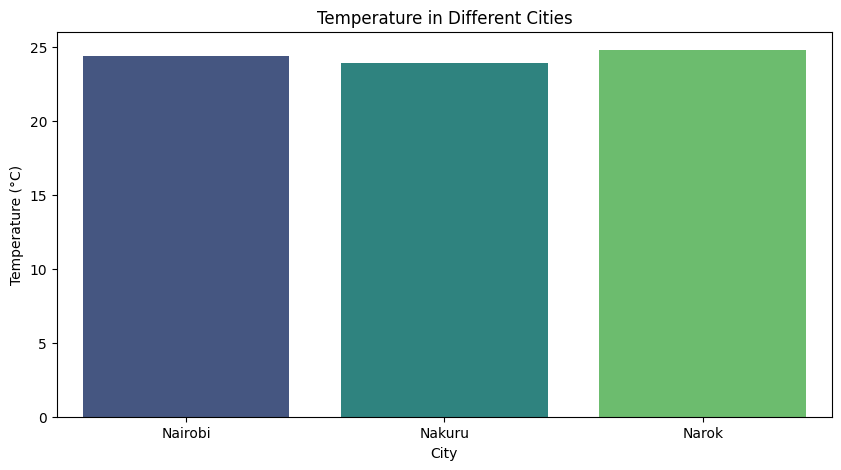

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='city_name', y='temparature', data=weather_df, palette='viridis')
plt.title('Temperature in Different Cities')
plt.ylabel('Temperature (°C)')
plt.xlabel('City')
plt.show()


<ipython-input-34-afece2cb6614>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='humidity', y='city_name', data=weather_df, palette='coolwarm')


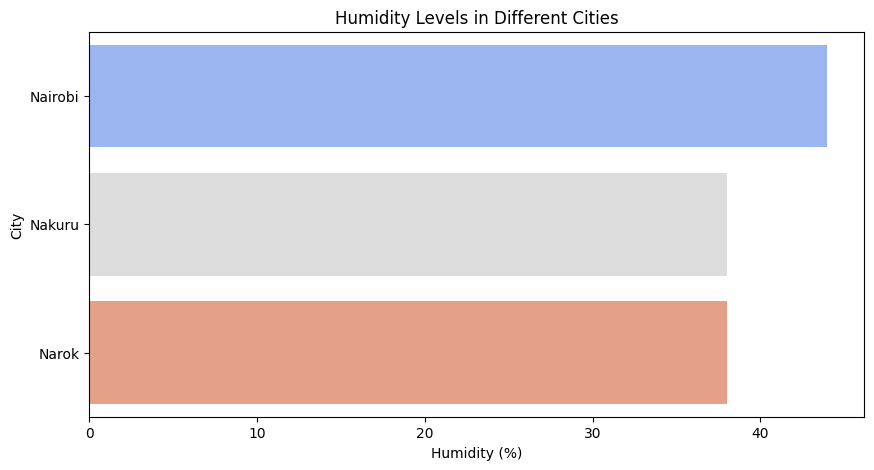

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='humidity', y='city_name', data=weather_df, palette='coolwarm')
plt.title('Humidity Levels in Different Cities')
plt.xlabel('Humidity (%)')
plt.ylabel('City')
plt.show()

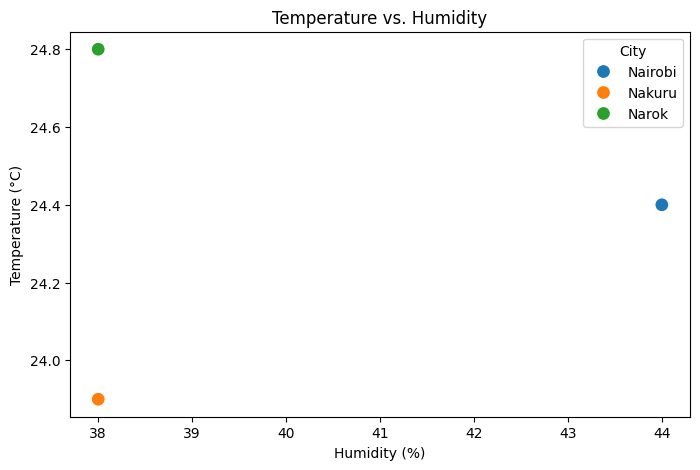

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='humidity', y='temparature', hue='city_name', data=weather_df, s=100)
plt.title('Temperature vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.legend(title='City')
plt.show()


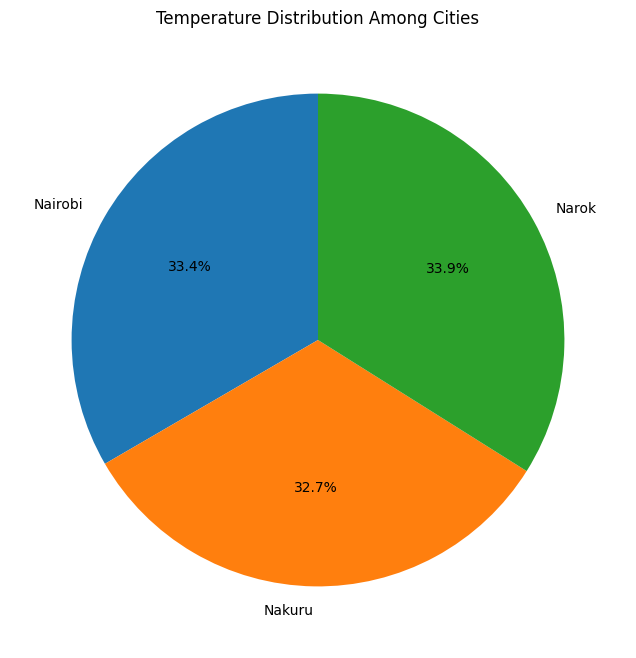

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(weather_df['temparature'], labels=weather_df['city_name'], autopct='%1.1f%%', startangle=90)
plt.title('Temperature Distribution Among Cities')
plt.show()


plt.figure(figsize=(8, 3))
sns.heatmap(weather_df[['city_name', 'temparature','rainfall',  'humidity', 'current_wind_speed']].set_index('city_name'), annot=True, cmap='coolwarm', cbar=False)
plt.title('Weather Data Overview')
plt.show()


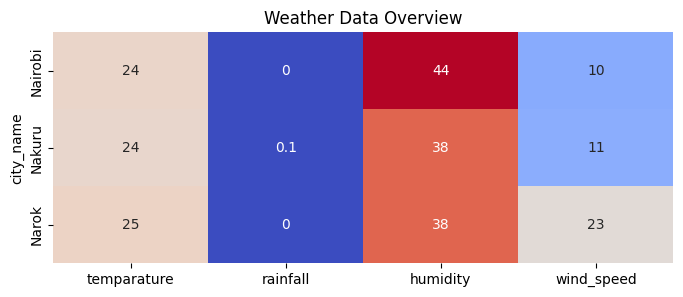

In [ ]:
plt.figure(figsize=(8, 3))
sns.heatmap(weather_df[['city_name', 'temparature','rainfall', 'humidity', 'wind_speed']].set_index('city_name'), annot=True, cmap='coolwarm', cbar=False)
plt.title('Weather Data Overview')
plt.show()


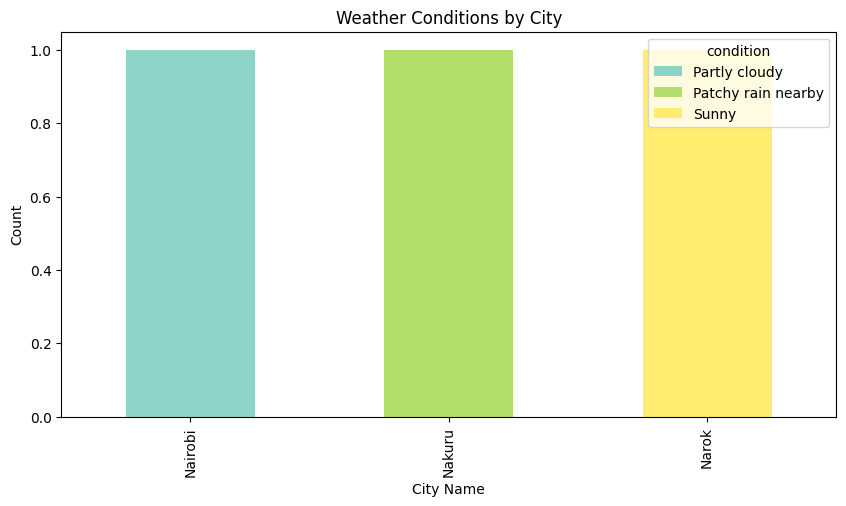

In [ ]:
# Create a pivot table for stacking
pivot_df = weather_df.pivot_table(index='city_name', columns='condition', aggfunc='size', fill_value=0)

# Create a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Weather Conditions by City')
plt.ylabel('Count')
plt.xlabel('City Name')
plt.show()
